## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [2]:
# to show full column and row
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_lc = pd.read_csv('loan.csv')
print(len(df_lc.columns))
df_lc.head()

111


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### On an uber level, scrolling throught the data post looking at few of the rows, we can see that certail set of columns might have a lot of NULL values. We will do further analysis to understand the data and understand more on the data availability. 

## Preliminary EDA of the Dataset

##### Preliminary EDA is done to remove columns based on data availability so that for the rest of the process we are focussing only on the required set of column

In [4]:
# finding basic information like total rows available vs number of values in each column
print(df_lc[['id']].count())
df_lc.info(verbose=True, show_counts=True)

id    39717
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  objec

### Finding the columns having nulls and then understanding percentage of nulls in each column

In [5]:
df_null = pd.DataFrame(df_lc.isnull().sum())
df_null = df_null.reset_index()
df_null.columns = ['column', 'null_count']
df_null = df_null[df_null['null_count']!=0]
df_null.head()

,column,null_count
10,emp_title,2459
11,emp_length,1075
19,desc,12940
21,title,11
28,mths_since_last_delinq,25682


In [6]:
df_lc['id'].count(), df_null['column'].count()

(39717, 68)

In [7]:
# now finding percentage of nulls
df_null['perc_nulls'] = (df_null['null_count']/df_lc['id'].count())*100
df_null.sort_values('perc_nulls', ascending = False).head(70)

,column,null_count,perc_nulls
76,bc_open_to_buy,39717,100.000000
74,acc_open_past_24mths,39717,100.000000
77,bc_util,39717,100.000000
80,mo_sin_old_il_acct,39717,100.000000
81,mo_sin_old_rev_tl_op,39717,100.000000
82,mo_sin_rcnt_rev_tl_op,39717,100.000000
83,mo_sin_rcnt_tl,39717,100.000000
84,mort_acc,39717,100.000000
85,mths_since_recent_bc,39717,100.000000
86,mths_since_recent_bc_dlq,39717,100.000000


In [8]:
print(df_null[df_null['perc_nulls']>32]['column'].count())

58


In [9]:
df_desc = pd.read_excel('Data_Dictionary.xlsx')
print(df_desc.columns)
df_desc = df_desc[['LoanStatNew', 'Description']]
df_desc = df_desc[df_desc['LoanStatNew'].isin(df_null[df_null['perc_nulls']>32]['column'].tolist())]
df_null_final = pd.merge(df_desc,df_null, how='inner',left_on=['LoanStatNew'],right_on=['column']).drop(['column', 'null_count'], axis=1)
pd.set_option('max_colwidth', None)
df_null_final.head(100)

Index(['LoanStatNew', 'Description', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')


,LoanStatNew,Description,perc_nulls
0,acc_open_past_24mths,Number of trades opened in past 24 months.,100.000000
1,all_util,Balance to credit limit on all trades,100.000000
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration,100.000000
3,avg_cur_bal,Average current balance of all accounts,100.000000
4,bc_open_to_buy,Total open to buy on revolving bankcards.,100.000000
5,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.,100.000000
6,desc,Loan description provided by the borrower,32.580507
7,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income",100.000000
8,il_util,Ratio of total current balance to high credit/credit limit on all install acct,100.000000
9,inq_fi,Number of personal finance inquiries,100.000000


In [10]:
# rechanging colwidth for ease of visualizing dataframe in the later part
pd.set_option('max_colwidth', 50)

### Observation:
#### 1. Around 58 columns have higher null values, with a lot of the columns having all null values
#### 2. For further analysis, all columns with > 90% null values in terms of rows will be dropped
#### 3. Column desc with 32% null values will be dropped because data is less and we are not going ahead with NLP techniques here. Topic Modeling could have been done further to get topics as categorical columns from this column but then again, data availability is less
#### 4. The column mths_since_last_delinq will be kept even if 64% data points are null assuming it will give some pattern to identify customers who have missed their payments on time. Assuming, most of them usually dont, hence 64% nulls are present.

## Removing columns which do not contain any value as this helps to do the EDA with the required set of variables containing information only

In [11]:
cols_to_remove = df_null[df_null['perc_nulls']>32]['column'].tolist()
cols_to_remove.remove('mths_since_last_delinq')
print(len(cols_to_remove))
cols_to_remove

57


['desc',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',

In [12]:
df_lc1 = df_lc.drop(cols_to_remove, axis = 1)
len(df_lc1.columns)

54

In [13]:
df_lc1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Deep Dive into EDA

In [14]:
# Next we will see column which have same value for all rows which will not provide any additional information
# before proceeding for imputation

In [15]:
df_lc1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


##### Now, as we do not require to predict any information, we can remove the column id as it does not provide any aggregated value. Additionally, member_id needs to be checked, if it is not categorical then we can drop it as well.

In [16]:
df_lc1.id.count(), df_lc1.member_id.count(), df_lc1.member_id.nunique()

(39717, 39717, 39717)

In [17]:
# Thus we can remove these two columns
df_ids = df_lc1[['id', 'member_id']] # still storing the ids in case required
df_lc2 = df_lc1.drop(['id', 'member_id'], axis=1)
df_lc2.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Based on observation after looking at the distribution of the columns, the following columns might have a single value throughout:
##### 1. collections_12_mths_ex_med
##### 2. policy_code
##### 3. acc_now_delinq
##### 4. chargeoff_within_12_mths
##### 5. delinq_amnt
##### 6. tax_liens
#### Check for these columns

In [18]:
check_cols = ['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
             'delinq_amnt', 'tax_liens']

for i in check_cols:
    print(i, ' : ', df_lc2[i].nunique())

collections_12_mths_ex_med  :  1
policy_code  :  1
acc_now_delinq  :  1
chargeoff_within_12_mths  :  1
delinq_amnt  :  1
tax_liens  :  1


In [19]:
# not creating another dataframe as removing basic columns without much operation
df_lc2.drop(check_cols, axis = 1, inplace = True)
print(len(df_lc2.columns))
df_lc2.head(1)

46


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,INDIVIDUAL,0.0


In [20]:
df_lc2.emp_title.nunique() 
# might be converted to some uber level categories as per requirements but for now, keepint as a check
# too many titles might not give any information

28820

## Indepth EDA
### Outlier Treatment
#### Checking the distribution of the variables, noticed a lot of variables which might have outliers
#### 1. Variables with min to 75th percentile range 0 but have other values after the 75th percentile
#### 2. Other variables might have outliers as well

In [21]:
# First step is to check at rows level if, example 90 percent of columns in a row has empty values
# Removing those rows might already remove outliers from multiple remaining columns as a whole

In [22]:
df_lc2.isnull().sum(axis=1).max()

4

In [23]:
# Did not have to go through the above process because maximum is 4 only.

In [24]:
# need to separate numerical and categorical variables
print(len(df_lc2.columns))
df_lc2.head(5)

46


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0


### There are two columns with percentages. Will convert it to value i.e. remove the percentage sign, and keeping it away from the outlier analysis for the time being

In [25]:
df_lc2['int_rate'] = df_lc2.int_rate.apply(lambda x: x[:-1])
df_lc2['revol_util'] = df_lc2['revol_util'].str.replace('%', '').astype(float)
df_lc2.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,INDIVIDUAL,0.0


In [26]:
# For the time being, setting aside variables as non numerical based on initial finding of the data
# As we need to outlier treatment of the numerical columns, therefore, need to separate them
non_numeric_cols = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status' , 'issue_d', 'pymnt_plan'
 , 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'pub_rec'
 , 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies', 'loan_status', 'int_rate', 'revol_util']
len(non_numeric_cols)

24

In [27]:
numeric_cols = list(set(df_lc2.columns)-set(non_numeric_cols))
numeric_cols

['total_rec_late_fee',
 'total_pymnt',
 'total_rec_prncp',
 'open_acc',
 'total_acc',
 'inq_last_6mths',
 'revol_bal',
 'delinq_2yrs',
 'annual_inc',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_int',
 'last_pymnt_amnt',
 'mths_since_last_delinq',
 'funded_amnt_inv',
 'out_prncp',
 'recoveries',
 'loan_amnt',
 'dti',
 'installment',
 'funded_amnt',
 'collection_recovery_fee']

In [28]:
len(numeric_cols) + len(non_numeric_cols)
# Cross check if total is same as that of the final dataframe

46

In [29]:
df_numeric = df_lc2[numeric_cols]
df_numeric.head()

,total_rec_late_fee,total_pymnt,total_rec_prncp,open_acc,total_acc,inq_last_6mths,revol_bal,delinq_2yrs,annual_inc,out_prncp_inv,total_pymnt_inv,total_rec_int,last_pymnt_amnt,mths_since_last_delinq,funded_amnt_inv,out_prncp,recoveries,loan_amnt,dti,installment,funded_amnt,collection_recovery_fee
0,0.00,5863.155187,5000.00,3,9,1,13648,0,24000.0,0.00,5833.84,863.16,171.62,NaN,4975.0,0.00,0.00,5000,27.65,162.87,5000,0.00
1,0.00,1008.710000,456.46,3,4,5,1687,0,30000.0,0.00,1008.71,435.17,119.66,NaN,2500.0,0.00,117.08,2500,1.00,59.83,2500,1.11
2,0.00,3005.666844,2400.00,2,10,2,2956,0,12252.0,0.00,3005.67,605.67,649.91,NaN,2400.0,0.00,0.00,2400,8.72,84.33,2400,0.00
3,16.97,12231.890000,10000.00,10,37,1,5598,0,49200.0,0.00,12231.89,2214.92,357.48,35.0,10000.0,0.00,0.00,10000,20.00,339.31,10000,0.00
4,0.00,3513.330000,2475.94,15,38,0,27783,0,80000.0,524.06,3513.33,1037.39,67.79,38.0,3000.0,524.06,0.00,3000,17.94,67.79,3000,0.00


In [30]:
def detect_outliers_boxplot(data):
    outliers = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    return outliers

# Function to detect outliers based on Z-score criteria
def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    for col in data.columns:
        z_scores = np.abs(stats.zscore(data[col]))
        outliers[col] = len(np.where(z_scores > threshold)[0])
    return outliers

# Function for outlier treatment: You can either remove or cap the outliers
def treat_outliers(data, method='remove', criteria='boxplot', threshold=3):
    if criteria == 'boxplot':
        outliers = detect_outliers_boxplot(data)
        for col in outliers:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            if method == 'remove':
                data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
            elif method == 'cap':
                data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
                data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

    elif criteria == 'zscore':
        for col in data.columns:
            z_scores = np.abs(stats.zscore(data[col]))
            if method == 'remove':
                data = data[z_scores < threshold]
            elif method == 'cap':
                data[col] = np.where(z_scores > threshold, np.sign(data[col]) * threshold * data[col].std(), data[col])
    
    return data

In [31]:
# Detect outliers using both methods
boxplot_outliers = detect_outliers_boxplot(df_numeric)
zscore_outliers = detect_outliers_zscore(df_numeric)

# Print outliers count by column
print("Outliers by Boxplot Criteria:", boxplot_outliers)
print("Outliers by Z-score Criteria:", zscore_outliers)

Outliers by Boxplot Criteria: {'total_rec_late_fee': 2046, 'total_pymnt': 1334, 'total_rec_prncp': 972, 'open_acc': 515, 'total_acc': 525, 'inq_last_6mths': 3634, 'revol_bal': 2497, 'delinq_2yrs': 4312, 'annual_inc': 1843, 'out_prncp_inv': 1140, 'total_pymnt_inv': 1441, 'total_rec_int': 3157, 'last_pymnt_amnt': 4286, 'mths_since_last_delinq': 4, 'funded_amnt_inv': 1000, 'out_prncp': 1140, 'recoveries': 4218, 'loan_amnt': 1230, 'dti': 0, 'installment': 1245, 'funded_amnt': 1038, 'collection_recovery_fee': 3782}
Outliers by Z-score Criteria: {'total_rec_late_fee': 838, 'total_pymnt': 613, 'total_rec_prncp': 480, 'open_acc': 372, 'total_acc': 353, 'inq_last_6mths': 260, 'revol_bal': 869, 'delinq_2yrs': 1009, 'annual_inc': 289, 'out_prncp_inv': 659, 'total_pymnt_inv': 624, 'total_rec_int': 901, 'last_pymnt_amnt': 1011, 'mths_since_last_delinq': 0, 'funded_amnt_inv': 587, 'out_prncp': 663, 'recoveries': 376, 'loan_amnt': 719, 'dti': 0, 'installment': 330, 'funded_amnt': 606, 'collection_rec

### Now, in the above section, did a random check to see which method for outlier would end up leading to a higher loss of data
### Observations:
#### 1. Z-Score method will be better for us to remove outliers as we would else unnecessarily remove a lot of data points
#### 2. Additionally, also need to check with data description if an extremely higher value would be sensible enough to be kept or to be removed based on business understanding depending on column type

### Before removing outliers, doing a basic univariate analysis of the numerical variables via a loop to understand more on the distribution

### Univariate Analysis - Numerical Variables

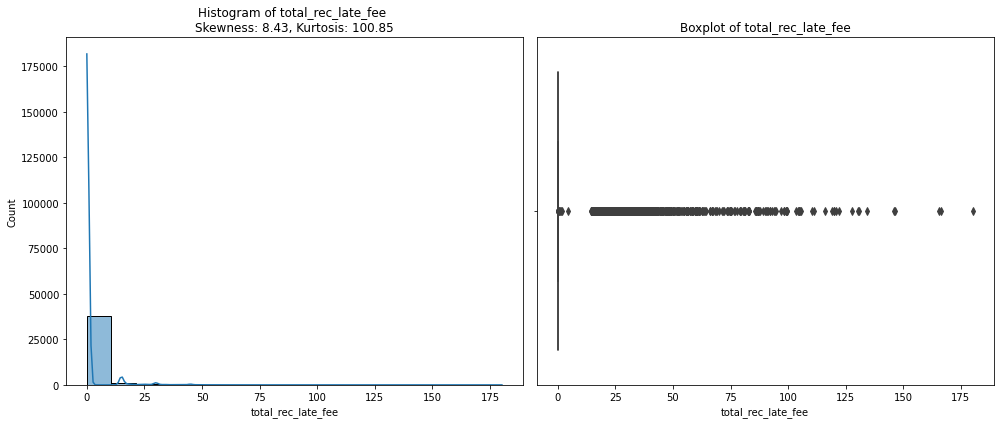

	total_rec_late_fee - Skewness: 8.43, Kurtosis: 100.85


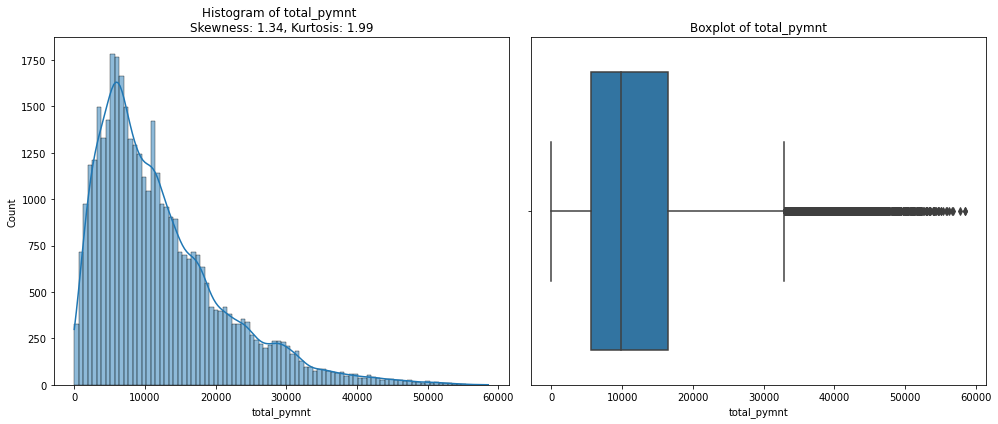

	total_pymnt - Skewness: 1.34, Kurtosis: 1.99


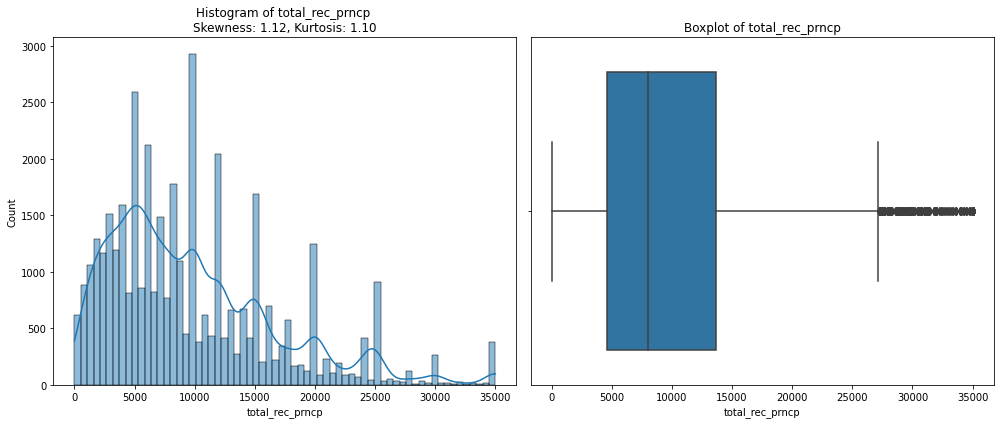

	total_rec_prncp - Skewness: 1.12, Kurtosis: 1.10


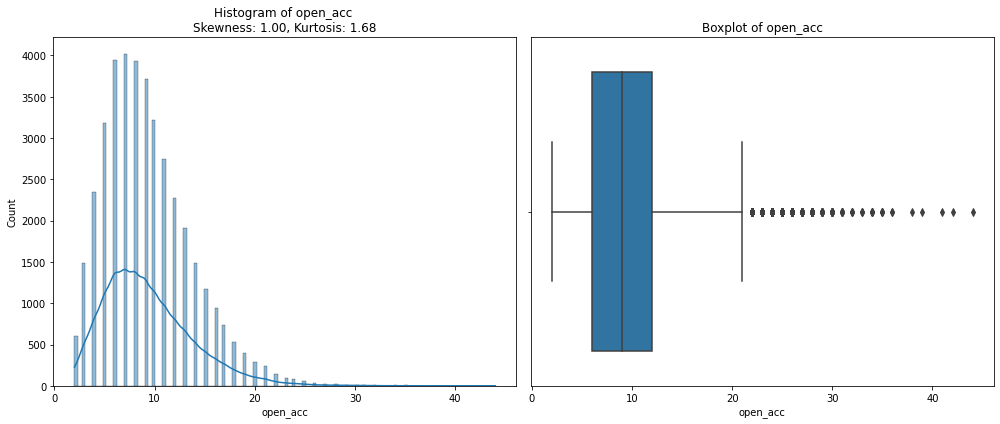

	open_acc - Skewness: 1.00, Kurtosis: 1.68


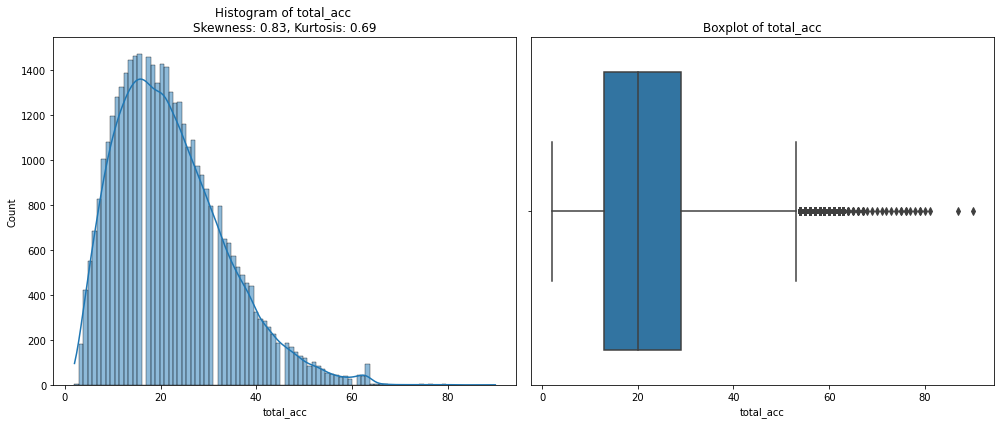

	total_acc - Skewness: 0.83, Kurtosis: 0.69


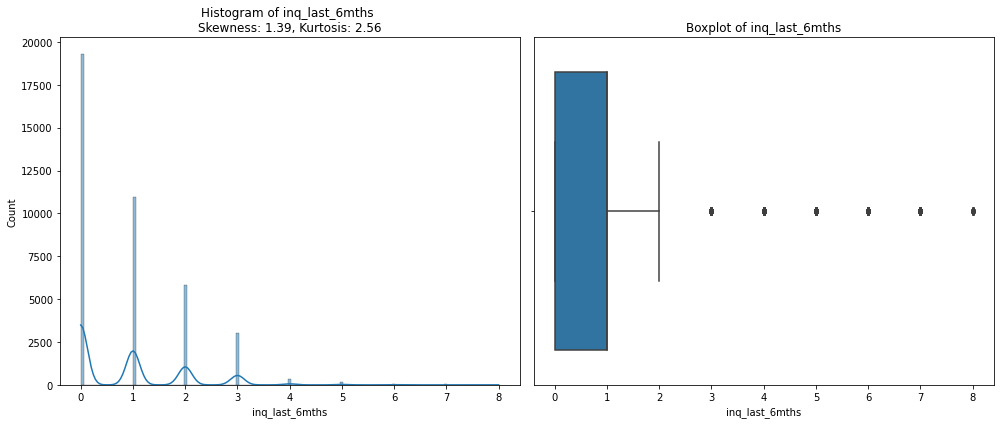

	inq_last_6mths - Skewness: 1.39, Kurtosis: 2.56


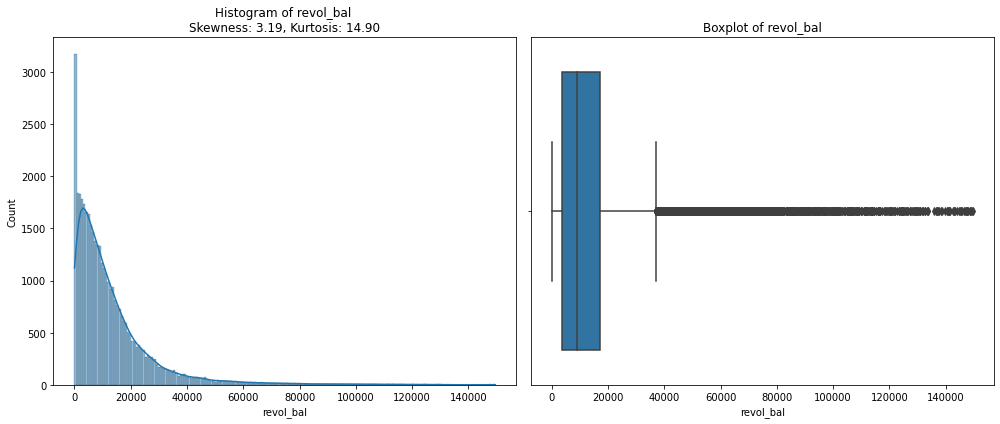

	revol_bal - Skewness: 3.19, Kurtosis: 14.90


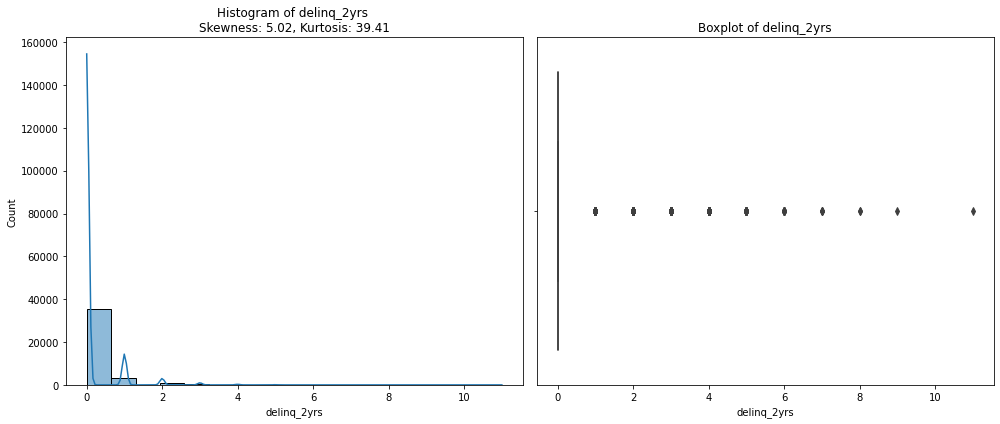

	delinq_2yrs - Skewness: 5.02, Kurtosis: 39.41


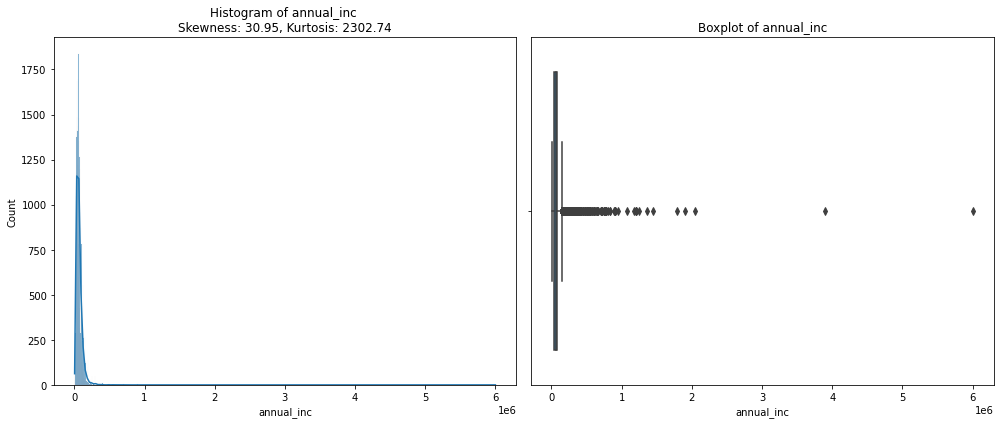

	annual_inc - Skewness: 30.95, Kurtosis: 2302.74


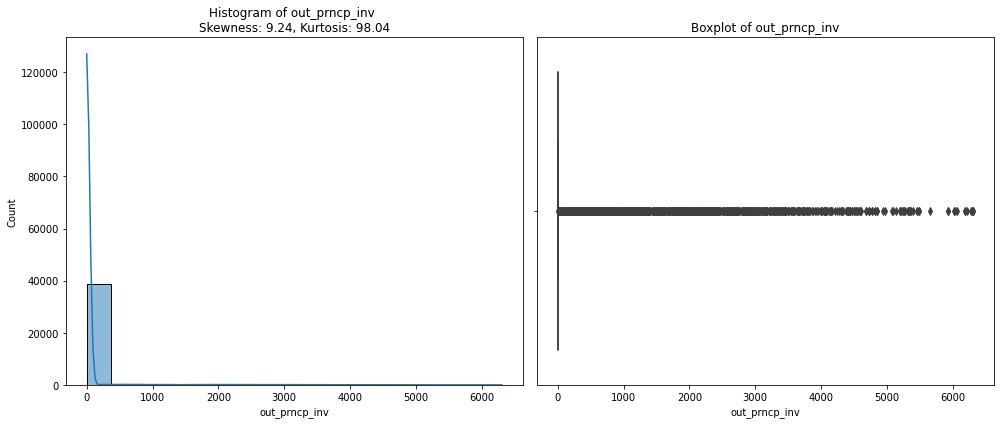

	out_prncp_inv - Skewness: 9.24, Kurtosis: 98.04


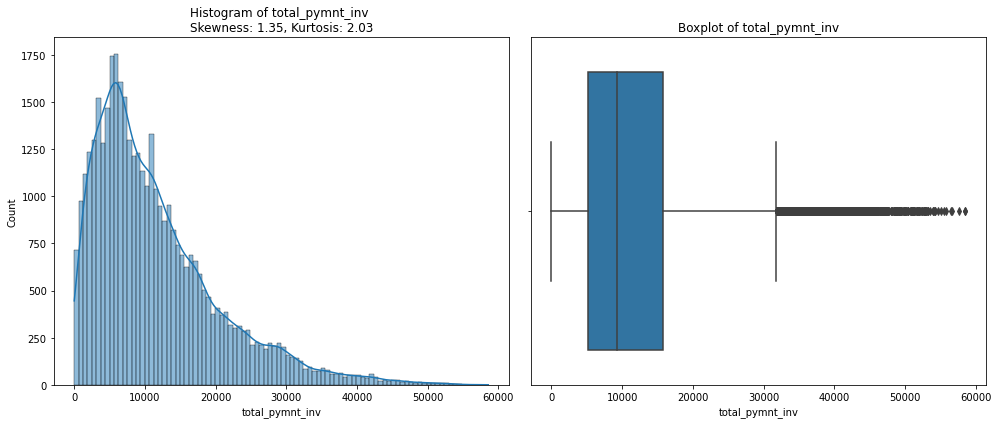

	total_pymnt_inv - Skewness: 1.35, Kurtosis: 2.03


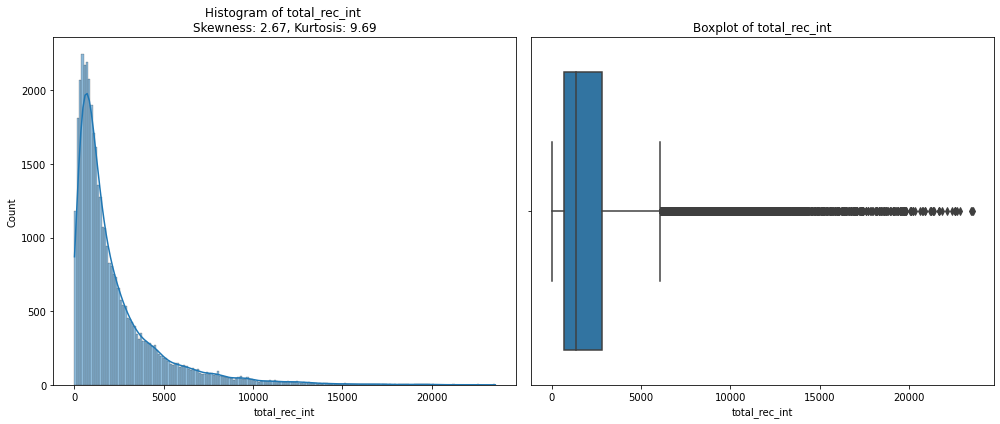

	total_rec_int - Skewness: 2.67, Kurtosis: 9.69


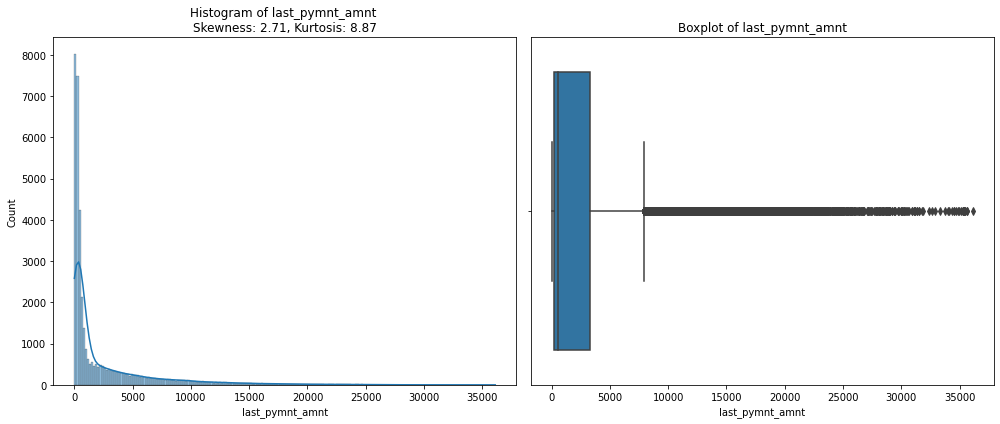

	last_pymnt_amnt - Skewness: 2.71, Kurtosis: 8.87


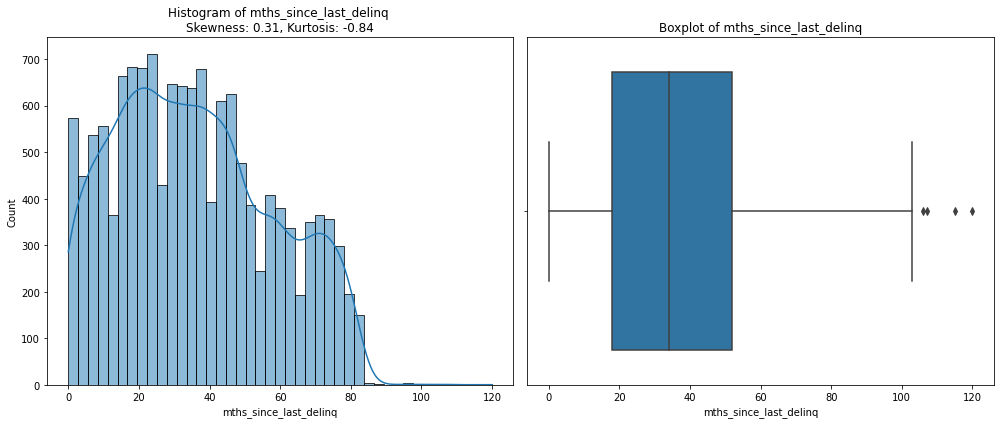

	mths_since_last_delinq - Skewness: 0.31, Kurtosis: -0.84


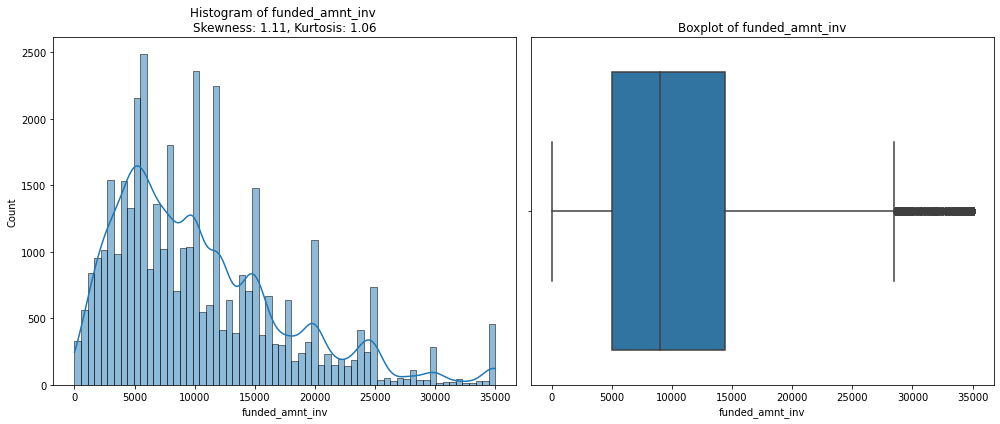

	funded_amnt_inv - Skewness: 1.11, Kurtosis: 1.06


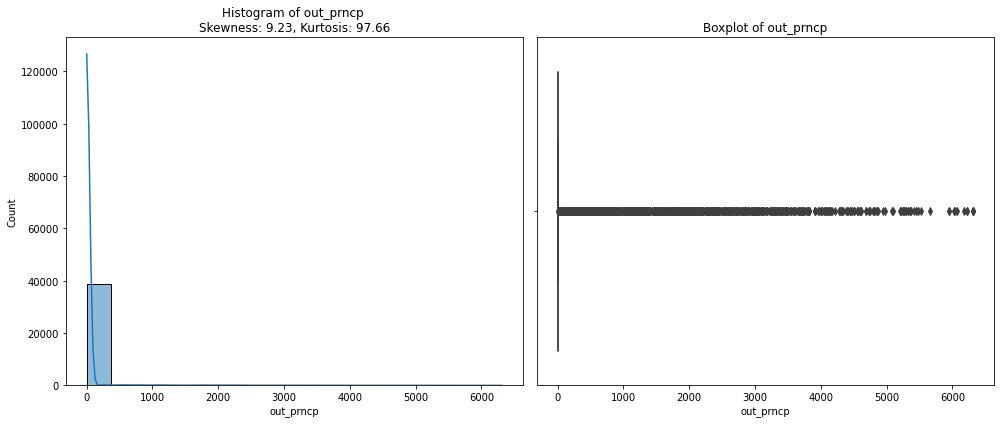

	out_prncp - Skewness: 9.23, Kurtosis: 97.66


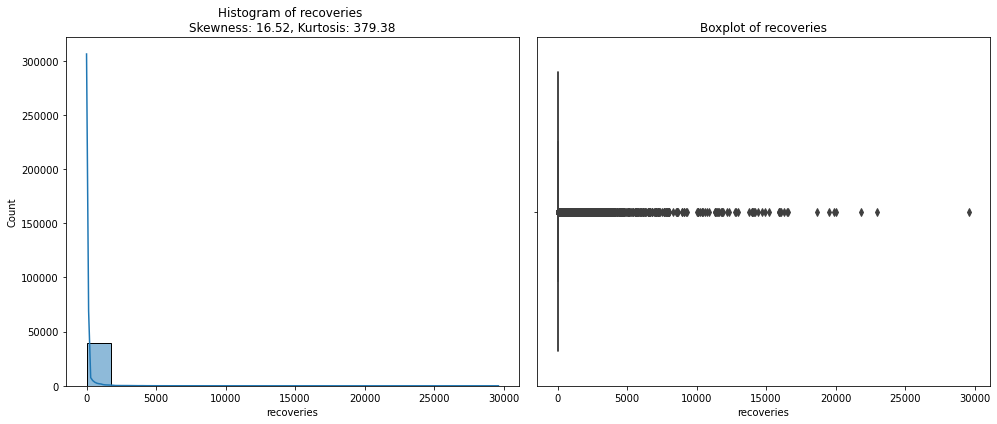

	recoveries - Skewness: 16.52, Kurtosis: 379.38


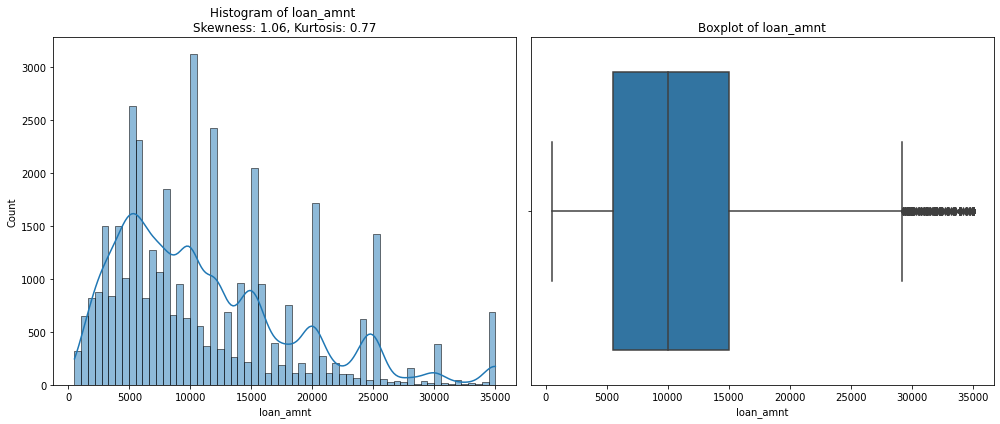

	loan_amnt - Skewness: 1.06, Kurtosis: 0.77


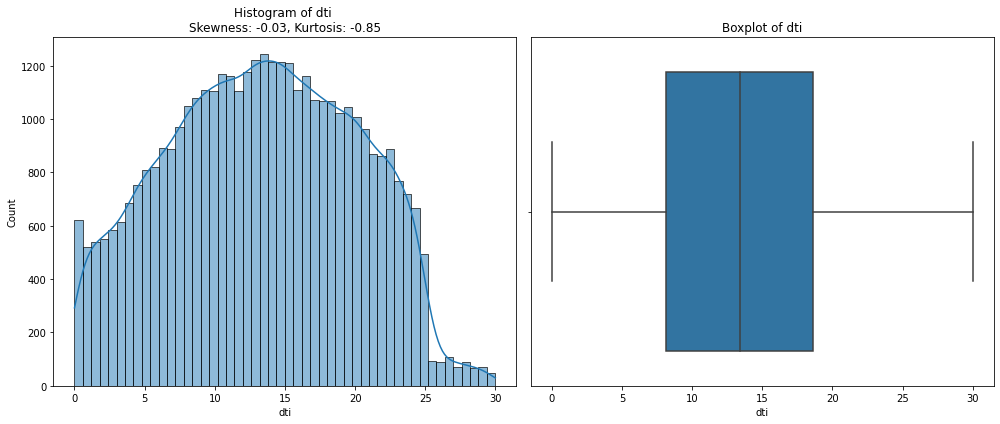

	dti - Skewness: -0.03, Kurtosis: -0.85


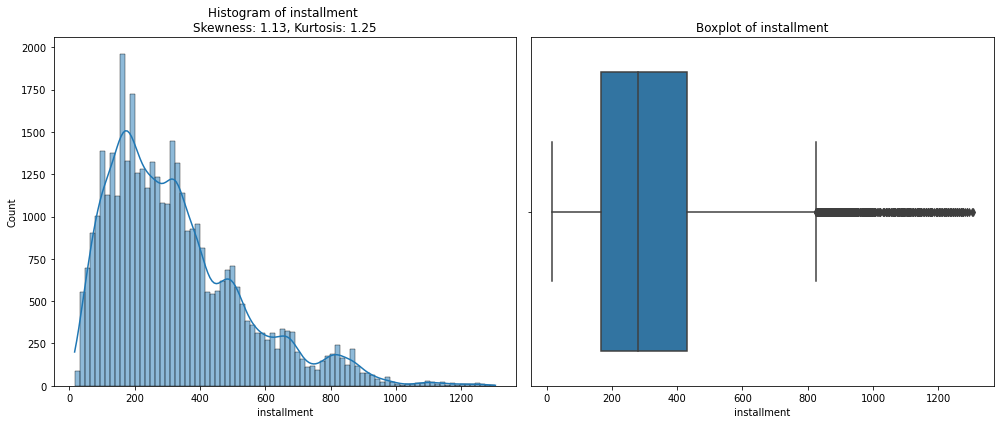

	installment - Skewness: 1.13, Kurtosis: 1.25


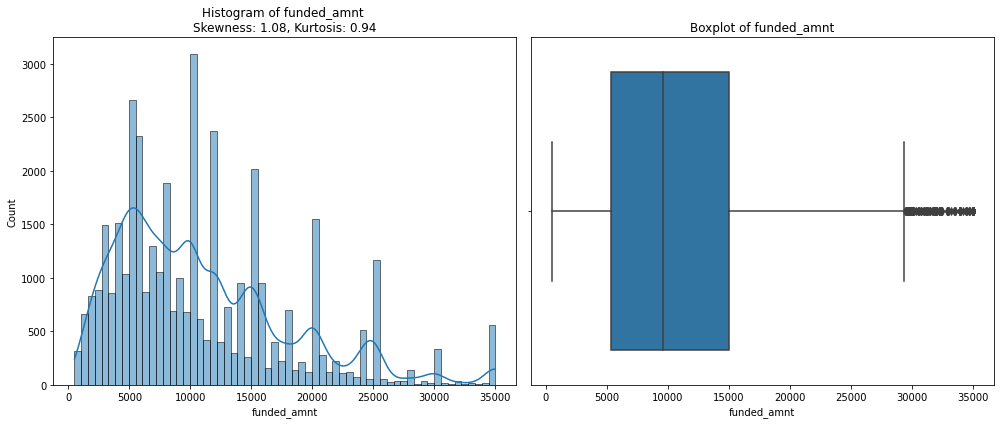

	funded_amnt - Skewness: 1.08, Kurtosis: 0.94


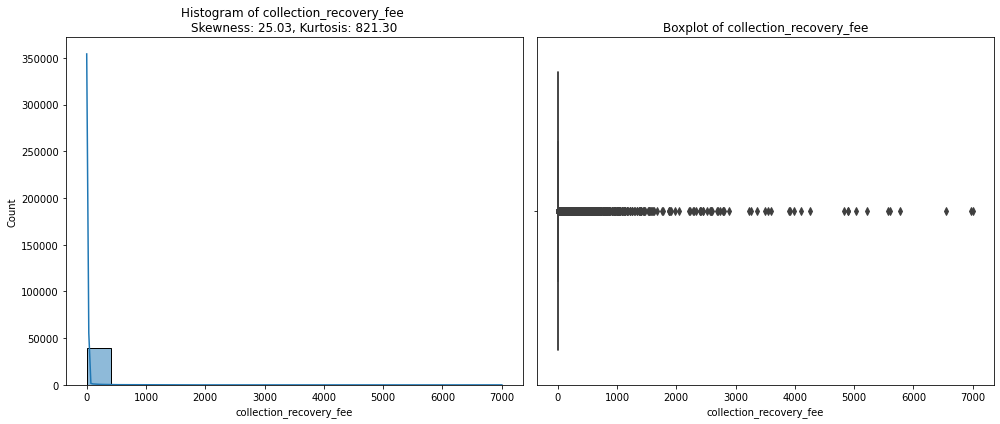

	collection_recovery_fee - Skewness: 25.03, Kurtosis: 821.30


In [32]:
# Loop through each numerical column
for column in df_numeric.columns:
    
    # Calculate skewness and kurtosis
    skewness = df_numeric[column].skew()
    kurtosis = df_numeric[column].kurtosis()
    
    # Create a figure with 2 subplots: one for the histogram and one for the boxplot
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the histogram
    sns.histplot(df_numeric[column], kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram of {column} \nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
    
    # Plot the boxplot
    sns.boxplot(x=df_numeric[column], ax=axs[1])
    axs[1].set_title(f'Boxplot of {column}')
    
    # Show the plots
    plt.tight_layout()
    plt.show()
    
    # Print skewness and kurtosis
    print(f"\t{column} - Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")


## Observations:
##### Based on graphs and data description understanding we will select columns which needs to be taken ahead for outlier treatment
### 1. Columns such as funded_amt_inv, revolving_bal, total_payment, installment, funded_amt, total_payment_invested, total_rec_int, total_rec_prncp, annual_inc can be treated for outlier as they involve certain higher amounts
### 2. Certain columns can be converted to categories to further do bivariate analysis such as inq_last_6_mths (might be already categorical), delinq_2_yrs, open_acc, total_acc, mths_since_last_delinq (can be converted to category to see whether people with delinquency recently tend to miss payments more in following time)

In [33]:
#inq since last 6 months might be categorical
df_numeric.inq_last_6mths.value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

In [34]:
# Kept this to have a check how many rows we will miss after outlier treatment
# If we lose more rows, then we might go ahead with capping
df_numeric.annual_inc.count()

39717

In [35]:
outlier_trt_rqd = ['funded_amnt_inv', 'revol_bal', 'total_pymnt', 'installment', 'funded_amnt', 'total_pymnt_inv'
                   , 'total_rec_int', 'total_rec_prncp', 'annual_inc']

### Now, as payments and income levels can vary, it is not always right to exclude outliers, therefore, checking with correlation matrix to see, how many of these variables (numerical) are highly correlated. Then we can remove few highly correlated variables out of these

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

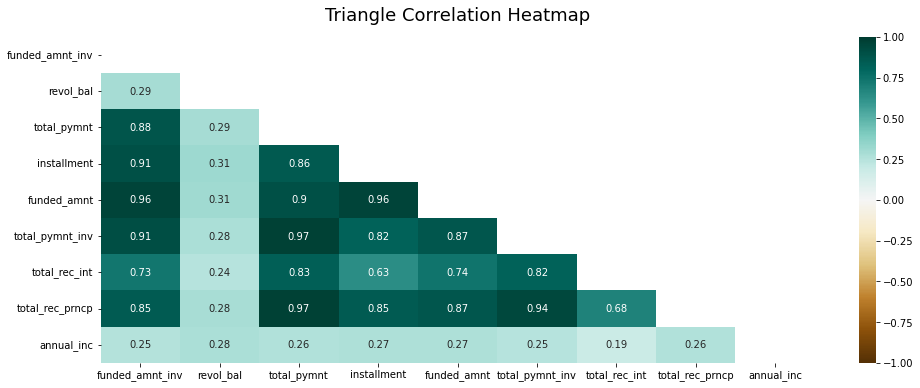

In [36]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_numeric[outlier_trt_rqd].corr(), dtype=np.bool))
heatmap = sns.heatmap(df_numeric[outlier_trt_rqd].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### The idea behind going down on correlation plot at this point is, because initially with too many variables, it is more difficult to understand which ones to keep and which ones to not. Now, with lesser variables, it becomes easier to interpret things in detail

In [37]:
# Optional: Apply outlier treatment (choose 'remove' or 'cap', 'boxplot' or 'zscore')
df_cleaned = treat_outliers(df_numeric[outlier_trt_rqd], method='remove', criteria='boxplot')  # Removing boxplot outliers
# df_cleaned = treat_outliers(df, method='cap', criteria='zscore')  # Capping z-score outliers

# Output the cleaned DataFrame
print(df_cleaned.annual_inc.count())

30749


In [38]:
# Optional: Apply outlier treatment (choose 'remove' or 'cap', 'boxplot' or 'zscore')
# df_cleaned = treat_outliers(df_numeric[outlier_trt_rqd], method='remove', criteria='boxplot')  # Removing boxplot outliers
df_cleaned = treat_outliers(df_numeric[outlier_trt_rqd], method='remove', criteria='zscore')  # Capping z-score outliers

# Output the cleaned DataFrame
print(df_cleaned.annual_inc.count())

36102


In [39]:
print(((39717-36102)/39717)*100)
print(((39717-30749)/39717)*100)

9.10189591358864
22.57975174358587


## Creating Categorical Columns from the outlier treatment excluded cols for further analysis

In [40]:
def get_remaining_cols(l1, l2):
    return list(set(l1)-set(l2))

In [41]:
rem_cols = get_remaining_cols(df_numeric.columns, outlier_trt_rqd)
print(rem_cols)

['total_rec_late_fee', 'out_prncp', 'recoveries', 'total_acc', 'inq_last_6mths', 'out_prncp_inv', 'last_pymnt_amnt', 'loan_amnt', 'open_acc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'collection_recovery_fee']


### Code to get the rest of the dataframe to have only relevant rows after outlier treatment of the relevant numerical cols

In [42]:
# If it was a ML problem statement, we could have added df_ids as well to later have id_level predictions
# df_ids
df_outlier_treated = pd.concat([df_cleaned, df_numeric[rem_cols], df_lc2[non_numeric_cols]], axis=1, join="inner")
df_outlier_treated.annual_inc.count()

36102

### Data Imputation and Manipulation

##### Step 1: Check basic data and complete imputation and remove unnceessary columns

In [43]:
df_outlier_treated['application_type'].value_counts()
# we can drop this column as it has the same value throughout

INDIVIDUAL    36102
Name: application_type, dtype: int64

In [44]:
print(df_outlier_treated.pymnt_plan.value_counts())
print(df_outlier_treated.initial_list_status.value_counts())

n    36102
Name: pymnt_plan, dtype: int64
f    36102
Name: initial_list_status, dtype: int64


In [45]:
class preprocessing:
    
    def __init__(self, df, numerical_cols, categorical_cols, cols_to_drop):
        self.df = df
        self.numerical_cols = numerical_cols
        self.categorical_cols = categorical_cols
        self.cols_to_drop = cols_to_drop
#         self.impute_zero = impute_zero
    #for all numerical cols, as we have treated for outliers majorly
    # imputing it with mean itself and not median
    # as per requirement can go with median as well
    def imputation(self):
        self.df_num = self.df[self.numerical_cols].apply(lambda x: x.fillna(x.mean()))
        self.df_cat = self.df[self.categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
        
    def get_remaining_cols(self, l1, l2, l3):
        return list(set(l1)-set(l2)-set(l3))
    
    
    #main method within class  
    def preprocessing(self):
        
        print('original_df shape: ', self.df.shape)
        #dropping columns
        self.df.drop(self.cols_to_drop, axis=1, inplace = True)
        
        
        self.imputation()
#         print(self.df_num.shape)
#         print(self.df_cat.shape)
        
        cols_rem = self.get_remaining_cols(self.df.columns, self.numerical_cols, self.categorical_cols)
        
        self.df_final = pd.concat([self.df[cols_rem], self.df_num, self.df_cat], axis = 1, join="inner")
        print('Null Check:', self.df_final.isnull().sum())
        # As still there will be some columns where mean, median or avg wont make sense
        # example mths_since_last_delinq
        # For such columns we need to impute them by 0
        
        self.df_final[['title']].fillna('Other', inplace = True)
        self.df_final['emp_title'].fillna('Other', inplace = True)
        self.df_final.fillna(0, axis=1, inplace = True)
        
        print(self.df_final.shape)
        # last_pymnt_d and last_credit_pull_d has 69 and 2 nulls therefore planning to drop these off
        self.df_final.dropna(axis = 1, inplace = True)
        print('final null check: ', self.df_final.isnull().sum())
        print('final_df shape: ', self.df_final.shape)
        return self.df_final

In [46]:
# df = pd.DataFrame({'a': [1,1,np.nan,2], 'b':[2,2,np.nan,3]})
# print(df.head())
# # df[['a', 'b']].apply(lambda x: x.fillna(x.mode()[0]))
# df[['a', 'b']].apply(lambda x: x.fillna(x.mean()))# cross check to see if the imputation works

In [47]:
obj = preprocessing(df_outlier_treated, ['revol_util'], ['emp_length'],['application_type', 'url', 'pymnt_plan', 'initial_list_status'])
df_imputed = obj.preprocessing()
df_imputed.shape

original_df shape:  (36102, 46)
Null Check: total_rec_late_fee             0
total_pymnt                    0
total_rec_prncp                0
zip_code                       0
purpose                        0
open_acc                       0
last_pymnt_d                  69
issue_d                        0
emp_title                   2234
total_acc                      0
inq_last_6mths                 0
pub_rec                        0
revol_bal                      0
home_ownership                 0
delinq_2yrs                    0
annual_inc                     0
addr_state                     0
loan_status                    0
total_pymnt_inv                0
total_rec_int                  0
out_prncp_inv                  0
last_pymnt_amnt                0
term                           0
sub_grade                      0
verification_status            0
mths_since_last_delinq     23269
last_credit_pull_d             2
funded_amnt_inv                0
grade                          0

(36102, 42)

In [48]:
df_imputed.head(200)

,total_rec_late_fee,total_pymnt,total_rec_prncp,zip_code,purpose,open_acc,last_pymnt_d,issue_d,emp_title,total_acc,inq_last_6mths,pub_rec,revol_bal,home_ownership,delinq_2yrs,annual_inc,addr_state,loan_status,total_pymnt_inv,total_rec_int,out_prncp_inv,last_pymnt_amnt,term,sub_grade,verification_status,mths_since_last_delinq,last_credit_pull_d,funded_amnt_inv,grade,out_prncp,recoveries,loan_amnt,pub_rec_bankruptcies,dti,funded_amnt,installment,title,earliest_cr_line,collection_recovery_fee,int_rate,revol_util,emp_length
0,0.000000,5863.155187,5000.00,860xx,credit_card,3,Jan-15,Dec-11,Other,9,1,0,13648,RENT,0,24000.00,AZ,Fully Paid,5833.84,863.16,0.00,171.62,36 months,B2,Verified,0.0,May-16,4975.00000,B,0.00,0.00,5000,0.0,27.65,5000,162.87,Computer,Jan-85,0.0000,10.65,83.70,10+ years
1,0.000000,1008.710000,456.46,309xx,car,3,Apr-13,Dec-11,Ryder,4,5,0,1687,RENT,0,30000.00,GA,Charged Off,1008.71,435.17,0.00,119.66,60 months,C4,Source Verified,0.0,Sep-13,2500.00000,C,0.00,117.08,2500,0.0,1.00,2500,59.83,bike,Apr-99,1.1100,15.27,9.40,< 1 year
2,0.000000,3005.666844,2400.00,606xx,small_business,2,Jun-14,Dec-11,Other,10,2,0,2956,RENT,0,12252.00,IL,Fully Paid,3005.67,605.67,0.00,649.91,36 months,C5,Not Verified,0.0,May-16,2400.00000,C,0.00,0.00,2400,0.0,8.72,2400,84.33,real estate business,Nov-01,0.0000,15.96,98.50,10+ years
3,16.970000,12231.890000,10000.00,917xx,other,10,Jan-15,Dec-11,AIR RESOURCES BOARD,37,1,0,5598,RENT,0,49200.00,CA,Fully Paid,12231.89,2214.92,0.00,357.48,36 months,C1,Source Verified,35.0,Apr-16,10000.00000,C,0.00,0.00,10000,0.0,20.00,10000,339.31,personel,Feb-96,0.0000,13.49,21.00,10+ years
4,0.000000,3513.330000,2475.94,972xx,other,15,May-16,Dec-11,University Medical Group,38,0,0,27783,RENT,0,80000.00,OR,Current,3513.33,1037.39,524.06,67.79,60 months,B5,Source Verified,38.0,May-16,3000.00000,B,524.06,0.00,3000,0.0,17.94,3000,67.79,Personal,Jan-96,0.0000,12.69,53.90,1 year
5,0.000000,5632.210000,5000.00,852xx,wedding,9,Jan-15,Dec-11,Veolia Transportaton,12,3,0,7963,RENT,0,36000.00,AZ,Fully Paid,5632.21,632.21,0.00,161.03,36 months,A4,Source Verified,0.0,Jan-16,5000.00000,A,0.00,0.00,5000,0.0,11.20,5000,156.46,My wedding loan I promise to pay back,Nov-04,0.0000,7.90,28.30,3 years
6,0.000000,10110.840000,6985.61,280xx,debt_consolidation,7,May-16,Dec-11,Southern Star Photography,11,1,0,17726,RENT,0,47004.00,NC,Fully Paid,10110.84,3125.23,0.00,1313.76,60 months,C5,Not Verified,0.0,May-16,7000.00000,C,0.00,0.00,7000,0.0,23.51,7000,170.08,Loan,Jul-05,0.0000,15.96,85.60,8 years
7,0.000000,3939.135294,3000.00,900xx,car,4,Jan-15,Dec-11,MKC Accounting,4,2,0,8221,RENT,0,48000.00,CA,Fully Paid,3939.14,939.14,0.00,111.34,36 months,E1,Source Verified,0.0,Dec-14,3000.00000,E,0.00,0.00,3000,0.0,5.35,3000,109.43,Car Downpayment,Jan-07,0.0000,18.64,87.50,9 years
8,0.000000,646.020000,162.02,958xx,small_business,11,Apr-12,Dec-11,Other,13,2,0,5210,OWN,0,40000.00,CA,Charged Off,646.02,294.94,0.00,152.39,60 months,F2,Source Verified,0.0,Aug-12,5600.00000,F,0.00,189.06,5600,0.0,5.55,5600,152.39,Expand Business & Buy Debt Portfolio,Apr-04,2.0900,21.28,32.60,4 years
9,0.000000,1476.190000,673.48,774xx,other,2,Nov-12,Dec-11,Starbucks,3,0,0,9279,RENT,0,15000.00,TX,Charged Off,1469.34,533.42,0.00,121.45,60 months,B5,Verified,0.0,Mar-13,5350.00000,B,0.00,269.29,5375,0.0,18.08,5375,121.45,Building my credit history.,Sep-04,2.5200,12.69,36.50,< 1 year


### Step 2: Manipulation

In [49]:
# 1. zip code - done
# 2. last credit pull d - done --
# 3. funded_amnt_inv (roundoff) - done
# 4. other and other loan combine for title - done
# 5. create categorical variable for total_acc
# 6. earliest cr line - find how old it is - done --
# 7. remove months from term if felt necessary - done
# 8. issue date and last pymnt d can be used to find tenure of loan -  done --

In [50]:
df_imputed.shape

(36102, 42)

In [51]:
df_fe = df_imputed
df_fe['zip_code'] = df_fe['zip_code'].apply(lambda x: x[:-2])
df_fe['funded_amnt_inv'] = df_fe['funded_amnt_inv'].apply(lambda x: np.round(x,2))
df_fe['last_credit_pull_d'] = df_fe['last_credit_pull_d'].replace(0, 'Dec-25')
df_fe['last_pymnt_d'] = df_fe['last_pymnt_d'].replace(0, 'Dec-25')
df_fe['title'] = df_fe['title'].replace({'Other': 'Other Loan'})
df_fe['term'] = df_fe['term'].str.strip().str.replace(' months', '').astype(int)

# converting the column of date to year date format with 01 as date to create relevant columns from these columns
# based on my research this process will take care of 96 as 1996 and 04 as 2004 as example
df_fe['last_credit_pull_d'] = pd.to_datetime(df_fe['last_credit_pull_d'], format='%b-%y').dt.strftime('%Y-%m-%d')
df_fe['earliest_cr_line'] = pd.to_datetime(df_fe['earliest_cr_line'], format='%b-%y').dt.strftime('%Y-%m-%d')
df_fe['last_pymnt_d'] = pd.to_datetime(df_fe['last_pymnt_d'], format='%b-%y').dt.strftime('%Y-%m-%d')
df_fe['issue_d'] = pd.to_datetime(df_fe['issue_d'], format='%b-%y').dt.strftime('%Y-%m-%d')

df_fe.head(3)

,total_rec_late_fee,total_pymnt,total_rec_prncp,zip_code,purpose,open_acc,last_pymnt_d,issue_d,emp_title,total_acc,inq_last_6mths,pub_rec,revol_bal,home_ownership,delinq_2yrs,annual_inc,addr_state,loan_status,total_pymnt_inv,total_rec_int,out_prncp_inv,last_pymnt_amnt,term,sub_grade,verification_status,mths_since_last_delinq,last_credit_pull_d,funded_amnt_inv,grade,out_prncp,recoveries,loan_amnt,pub_rec_bankruptcies,dti,funded_amnt,installment,title,earliest_cr_line,collection_recovery_fee,int_rate,revol_util,emp_length
0,0.0,5863.155187,5000.00,860,credit_card,3,2015-01-01,2011-12-01,Other,9,1,0,13648,RENT,0,24000.0,AZ,Fully Paid,5833.84,863.16,0.0,171.62,36,B2,Verified,0.0,2016-05-01,4975.0,B,0.0,0.00,5000,0.0,27.65,5000,162.87,Computer,1985-01-01,0.00,10.65,83.7,10+ years
1,0.0,1008.710000,456.46,309,car,3,2013-04-01,2011-12-01,Ryder,4,5,0,1687,RENT,0,30000.0,GA,Charged Off,1008.71,435.17,0.0,119.66,60,C4,Source Verified,0.0,2013-09-01,2500.0,C,0.0,117.08,2500,0.0,1.00,2500,59.83,bike,1999-04-01,1.11,15.27,9.4,< 1 year
2,0.0,3005.666844,2400.00,606,small_business,2,2014-06-01,2011-12-01,Other,10,2,0,2956,RENT,0,12252.0,IL,Fully Paid,3005.67,605.67,0.0,649.91,36,C5,Not Verified,0.0,2016-05-01,2400.0,C,0.0,0.00,2400,0.0,8.72,2400,84.33,real estate business,2001-11-01,0.00,15.96,98.5,10+ years


In [52]:
# checking if Dec 25 works for this purpose as other formats were throwing issues
print(df_fe['last_credit_pull_d'].max(), df_fe['last_pymnt_d'].max())
print(df_fe['last_credit_pull_d'].min(), df_fe['last_pymnt_d'].min())

2025-12-01 2025-12-01
2007-05-01 2008-01-01


### Step 3: Feature Extraction

In [53]:
# From what time how many years has the person had a credit line going with LC compared to issue date
# Categorical column for total_acc
# tenure paid from initial_d to last_pymnt_d in months
# title column needs to be dropped, can definitely fine tune it to if len(row)=1 then keep else other
# but that is unnecessary requirement for this purpose unless we are involving NLP here

In [54]:
df_fe.total_acc.max(), df_fe.total_acc.min()

(90, 2)

In [55]:
df_fe.total_acc.describe()

count    36102.000000
mean        21.476096
std         11.211207
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [56]:
df_fe['earliest_cr_no_years'] = pd.to_datetime(df_fe['issue_d']).dt.year - pd.to_datetime(df_fe['earliest_cr_line']).dt.year
#category for total_acc
bins = [0, 13, 18, 28, 60, 90]  # Define the range boundaries
labels = ['0-13', '14-18', '18-28', '28-60', '>60']  # Labels for each range

# Create a new column with categorical values based on the ranges
df_fe['total_acc_cat'] = pd.cut(df_fe['total_acc'], bins=bins, labels=labels, right=True)
df_fe.drop('title', axis = 1, inplace = True)
df_fe.head(3)

,total_rec_late_fee,total_pymnt,total_rec_prncp,zip_code,purpose,open_acc,last_pymnt_d,issue_d,emp_title,total_acc,inq_last_6mths,pub_rec,revol_bal,home_ownership,delinq_2yrs,annual_inc,addr_state,loan_status,total_pymnt_inv,total_rec_int,out_prncp_inv,last_pymnt_amnt,term,sub_grade,verification_status,mths_since_last_delinq,last_credit_pull_d,funded_amnt_inv,grade,out_prncp,recoveries,loan_amnt,pub_rec_bankruptcies,dti,funded_amnt,installment,earliest_cr_line,collection_recovery_fee,int_rate,revol_util,emp_length,earliest_cr_no_years,total_acc_cat
0,0.0,5863.155187,5000.00,860,credit_card,3,2015-01-01,2011-12-01,Other,9,1,0,13648,RENT,0,24000.0,AZ,Fully Paid,5833.84,863.16,0.0,171.62,36,B2,Verified,0.0,2016-05-01,4975.0,B,0.0,0.00,5000,0.0,27.65,5000,162.87,1985-01-01,0.00,10.65,83.7,10+ years,26,0-13
1,0.0,1008.710000,456.46,309,car,3,2013-04-01,2011-12-01,Ryder,4,5,0,1687,RENT,0,30000.0,GA,Charged Off,1008.71,435.17,0.0,119.66,60,C4,Source Verified,0.0,2013-09-01,2500.0,C,0.0,117.08,2500,0.0,1.00,2500,59.83,1999-04-01,1.11,15.27,9.4,< 1 year,12,0-13
2,0.0,3005.666844,2400.00,606,small_business,2,2014-06-01,2011-12-01,Other,10,2,0,2956,RENT,0,12252.0,IL,Fully Paid,3005.67,605.67,0.0,649.91,36,C5,Not Verified,0.0,2016-05-01,2400.0,C,0.0,0.00,2400,0.0,8.72,2400,84.33,2001-11-01,0.00,15.96,98.5,10+ years,10,0-13


In [57]:
df_fe['zip_code_1'] = df_fe.zip_code.apply(lambda x : x[0:1])
df_fe['int_rate'] = df_fe.int_rate.astype(float)
df_fe.head()

,total_rec_late_fee,total_pymnt,total_rec_prncp,zip_code,purpose,open_acc,last_pymnt_d,issue_d,emp_title,total_acc,inq_last_6mths,pub_rec,revol_bal,home_ownership,delinq_2yrs,annual_inc,addr_state,loan_status,total_pymnt_inv,total_rec_int,out_prncp_inv,last_pymnt_amnt,term,sub_grade,verification_status,mths_since_last_delinq,last_credit_pull_d,funded_amnt_inv,grade,out_prncp,recoveries,loan_amnt,pub_rec_bankruptcies,dti,funded_amnt,installment,earliest_cr_line,collection_recovery_fee,int_rate,revol_util,emp_length,earliest_cr_no_years,total_acc_cat,zip_code_1
0,0.00,5863.155187,5000.00,860,credit_card,3,2015-01-01,2011-12-01,Other,9,1,0,13648,RENT,0,24000.0,AZ,Fully Paid,5833.84,863.16,0.00,171.62,36,B2,Verified,0.0,2016-05-01,4975.0,B,0.00,0.00,5000,0.0,27.65,5000,162.87,1985-01-01,0.00,10.65,83.7,10+ years,26,0-13,8
1,0.00,1008.710000,456.46,309,car,3,2013-04-01,2011-12-01,Ryder,4,5,0,1687,RENT,0,30000.0,GA,Charged Off,1008.71,435.17,0.00,119.66,60,C4,Source Verified,0.0,2013-09-01,2500.0,C,0.00,117.08,2500,0.0,1.00,2500,59.83,1999-04-01,1.11,15.27,9.4,< 1 year,12,0-13,3
2,0.00,3005.666844,2400.00,606,small_business,2,2014-06-01,2011-12-01,Other,10,2,0,2956,RENT,0,12252.0,IL,Fully Paid,3005.67,605.67,0.00,649.91,36,C5,Not Verified,0.0,2016-05-01,2400.0,C,0.00,0.00,2400,0.0,8.72,2400,84.33,2001-11-01,0.00,15.96,98.5,10+ years,10,0-13,6
3,16.97,12231.890000,10000.00,917,other,10,2015-01-01,2011-12-01,AIR RESOURCES BOARD,37,1,0,5598,RENT,0,49200.0,CA,Fully Paid,12231.89,2214.92,0.00,357.48,36,C1,Source Verified,35.0,2016-04-01,10000.0,C,0.00,0.00,10000,0.0,20.00,10000,339.31,1996-02-01,0.00,13.49,21.0,10+ years,15,28-60,9
4,0.00,3513.330000,2475.94,972,other,15,2016-05-01,2011-12-01,University Medical Group,38,0,0,27783,RENT,0,80000.0,OR,Current,3513.33,1037.39,524.06,67.79,60,B5,Source Verified,38.0,2016-05-01,3000.0,B,524.06,0.00,3000,0.0,17.94,3000,67.79,1996-01-01,0.00,12.69,53.9,1 year,15,28-60,9


## Bi-variate Analysis

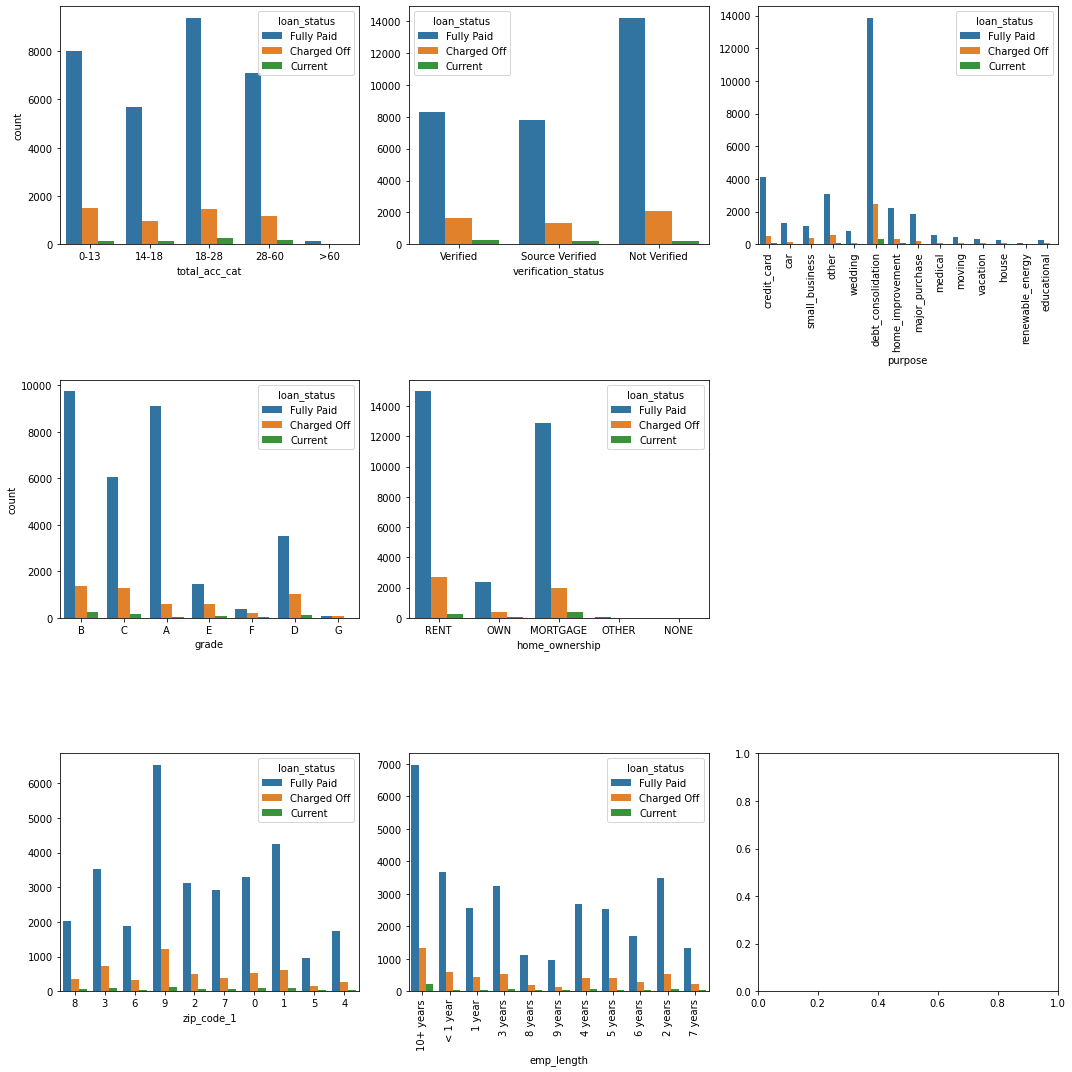

In [58]:
fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.countplot(ax = axis[0, 0], data = df_fe, x = "total_acc_cat", hue = "loan_status")
sns.countplot(ax = axis[0, 1], data = df_fe, x = "verification_status", hue = "loan_status").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df_fe, x = "purpose", hue = "loan_status").set(ylabel = None)
axis[0, 2].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[1, 0], data = df_fe, x = "grade", hue = "loan_status")
sns.countplot(ax = axis[1, 1], data = df_fe, x = "home_ownership", hue = "loan_status").set(ylabel = None)
sns.countplot(ax = axis[2, 1], data = df_fe, x = "emp_length", hue = "loan_status").set(ylabel = None)
axis[2, 1].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[2, 0], data = df_fe, x = "zip_code_1", hue = "loan_status").set(ylabel = None)
plt.tight_layout()
fig.delaxes(axis[1, 2])
plt.show()

In [59]:
def plot_categorical_vs_numerical(df, categorical_col, numerical_col, hue):
    
    # Plot the bar chart using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_col, y=numerical_col, data=df, hue = hue)
    
    # Add titles and labels
    plt.title(f'Bar Chart of {numerical_col} by {categorical_col}', fontsize=16)
    plt.xlabel(categorical_col, fontsize=12)
    plt.ylabel(f'Mean of {numerical_col}', fontsize=12)
    
    # Display the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

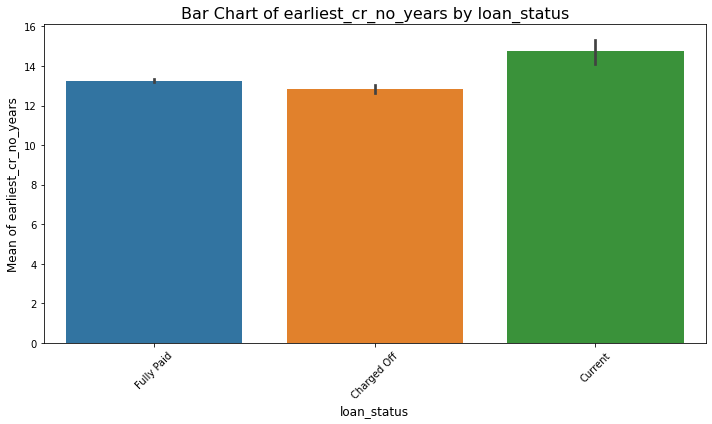

In [60]:
plot_categorical_vs_numerical(df_fe, 'loan_status',  'earliest_cr_no_years', hue = None)

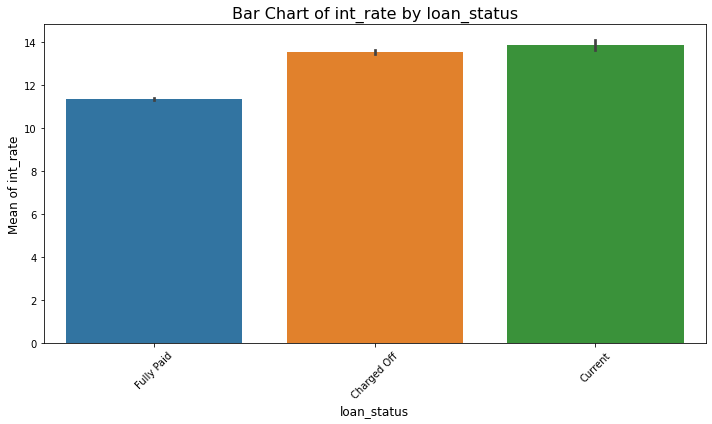

In [61]:
plot_categorical_vs_numerical(df_fe, 'loan_status',  'int_rate', hue = None)

loan_status
Charged Off    56575.481831
Current        61994.016063
Fully Paid     63366.354531
Name: annual_inc, dtype: float64


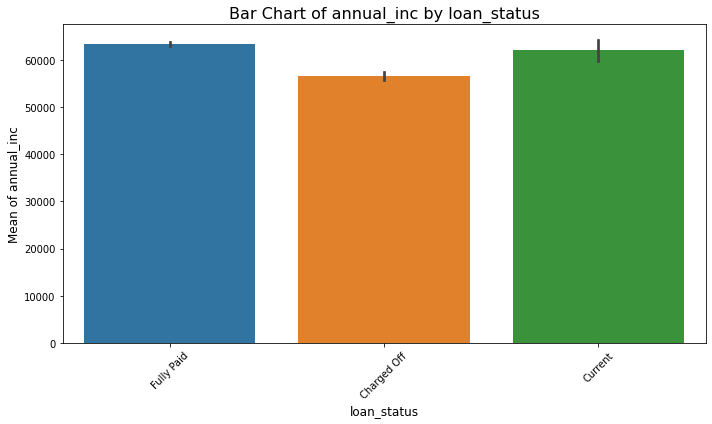

In [62]:
print(df_fe.groupby('loan_status')['annual_inc'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'annual_inc', hue = None)

loan_status  verification_status
Charged Off  Not Verified            250.705939
             Source Verified         278.412327
             Verified                360.239273
Current      Not Verified            238.823709
             Source Verified         247.594709
             Verified                321.620692
Fully Paid   Not Verified           2061.424339
             Source Verified        2678.925780
             Verified               4041.812884
Name: last_pymnt_amnt, dtype: float64


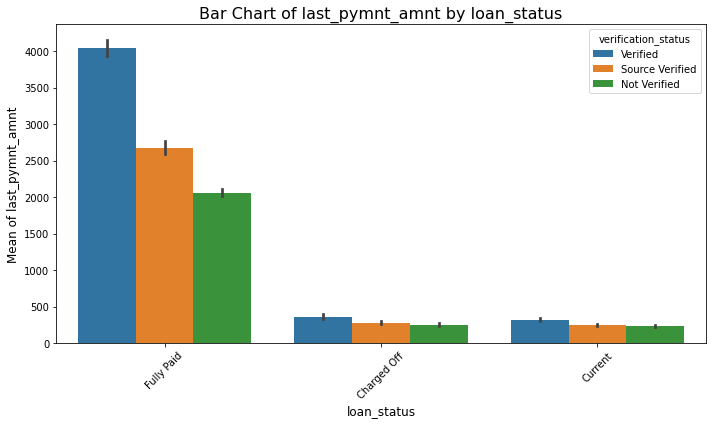

In [96]:
print(df_fe.groupby(['loan_status', 'verification_status'])['last_pymnt_amnt'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'last_pymnt_amnt', hue = 'verification_status')

loan_status
Charged Off     294.012721
Current         272.563865
Fully Paid     2763.687326
Name: last_pymnt_amnt, dtype: float64


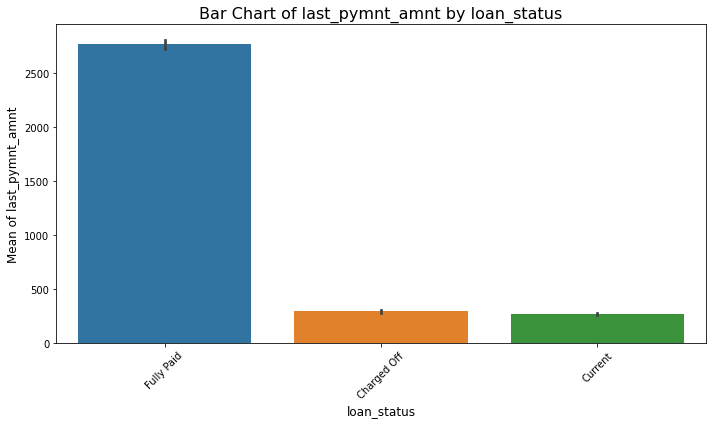

In [64]:
print(df_fe.groupby('loan_status')['last_pymnt_amnt'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'last_pymnt_amnt', hue = None)

loan_status
Charged Off     9547.431556
Current        11600.720560
Fully Paid      9083.899745
Name: funded_amnt_inv, dtype: float64


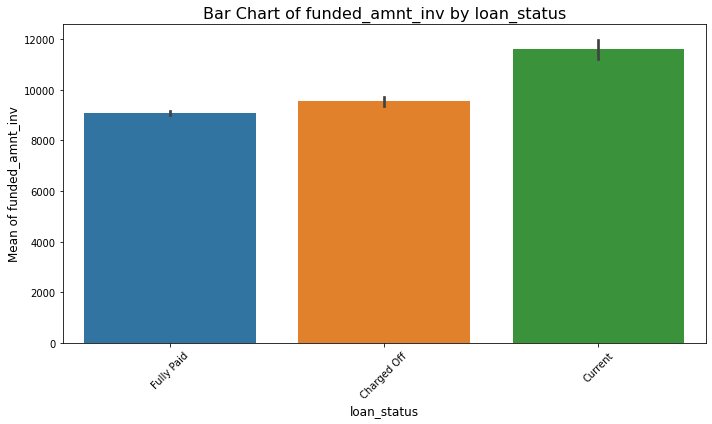

In [65]:
print(df_fe.groupby('loan_status')['funded_amnt_inv'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'funded_amnt_inv', hue = None)

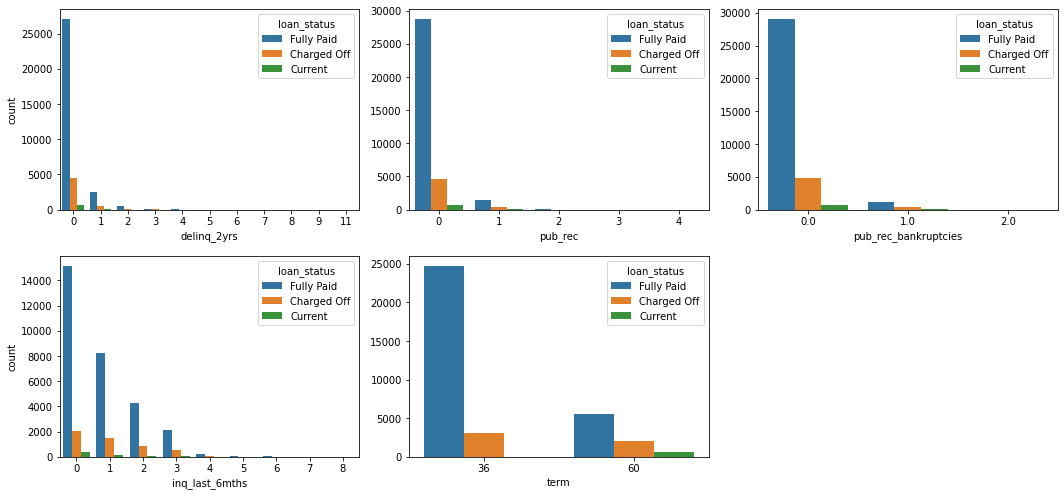

In [97]:

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df_fe, x = "delinq_2yrs", hue = "loan_status")
sns.countplot(ax = axis[0, 1], data = df_fe, x = "pub_rec", hue = "loan_status").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df_fe, x = "pub_rec_bankruptcies", hue = "loan_status").set(ylabel = None)
# axis[0, 2].tick_params(axis='x', rotation=90)
sns.countplot(ax = axis[1, 0], data = df_fe, x = "inq_last_6mths", hue = "loan_status")
sns.countplot(ax = axis[1, 1], data = df_fe, x = "term", hue = "loan_status").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])
plt.show()

In [67]:
print(df_fe.groupby(['loan_status', 'zip_code_1'])['annual_inc'].mean())

loan_status  zip_code_1
Charged Off  0             58698.071772
             1             56376.692516
             2             58411.791807
             3             52878.279441
             4             50831.545387
             5             56577.073846
             6             53635.037170
             7             57409.983737
             8             56150.867609
             9             59046.762762
Current      0             66703.106024
             1             58821.189714
             2             65115.943056
             3             63877.725714
             4             54646.408333
             5             55900.478261
             6             52715.180000
             7             69654.982456
             8             60982.490566
             9             63093.157025
Fully Paid   0             66148.885107
             1             63314.576917
             2             65834.647303
             3             60534.666159
             4  

loan_status  verification_status
Charged Off  Not Verified           13.813634
             Source Verified        12.965526
             Verified               14.910983
Current      Not Verified           14.933474
             Source Verified        12.859865
             Verified               16.018385
Fully Paid   Not Verified           12.872914
             Source Verified        12.610178
             Verified               13.866262
Name: dti, dtype: float64
loan_status
Charged Off    13.951627
Current        14.674368
Fully Paid     13.078363
Name: dti, dtype: float64


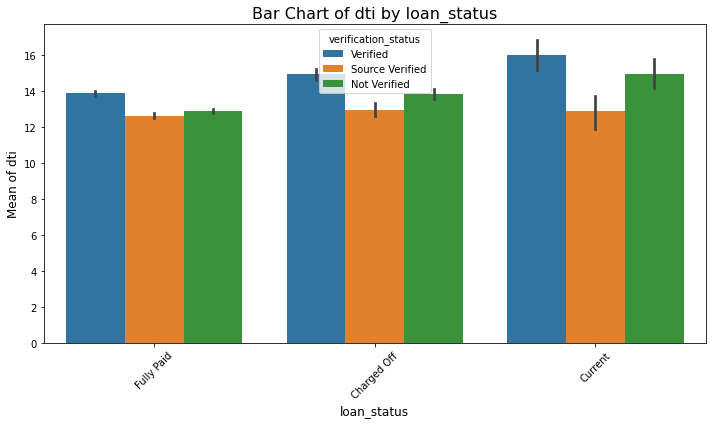

In [63]:
print(df_fe.groupby(['loan_status', 'verification_status'])['dti'].mean())
print(df_fe.groupby(['loan_status'])['dti'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'dti', hue = 'verification_status')

loan_status  verification_status
Charged Off  Not Verified           54.030957
             Source Verified        56.039298
             Verified               55.175284
Current      Not Verified           47.771831
             Source Verified        50.274933
             Verified               47.993462
Fully Paid   Not Verified           45.546533
             Source Verified        47.795419
             Verified               48.056660
Name: revol_util, dtype: float64


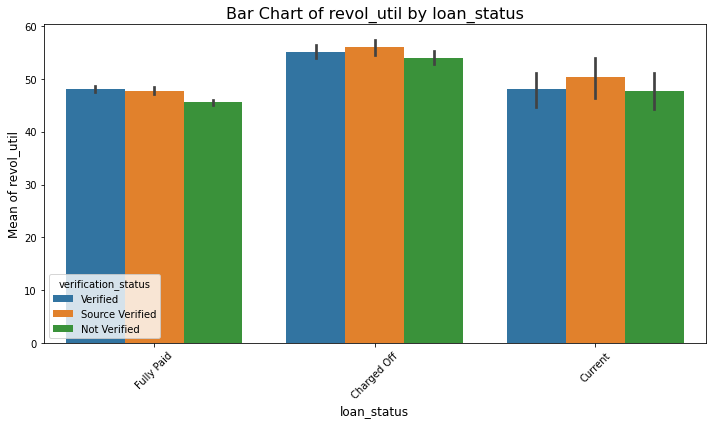

In [94]:
print(df_fe.groupby(['loan_status', 'verification_status'])['revol_util'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'revol_util', hue = 'verification_status')

loan_status  verification_status
Charged Off  Not Verified            4724.642942
             Source Verified         5178.103504
             Verified                7312.213534
Current      Not Verified           13324.610376
             Source Verified        13514.004978
             Verified               17572.244346
Fully Paid   Not Verified            9459.264190
             Source Verified        10587.290771
             Verified               15009.150683
Name: total_pymnt, dtype: float64


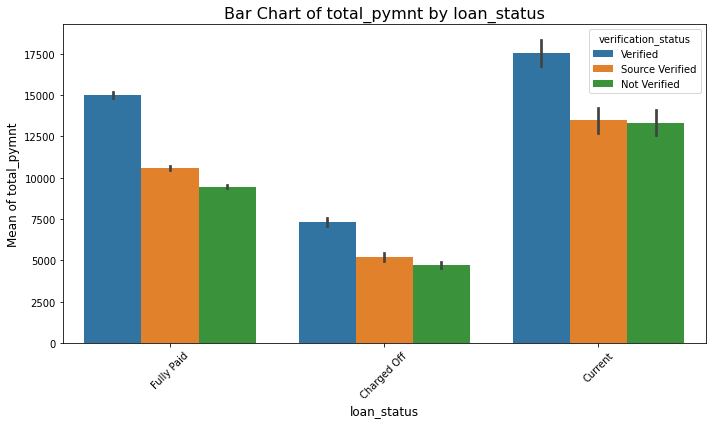

In [99]:
# total_pymnt
print(df_fe.groupby(['loan_status', 'verification_status'])['total_pymnt'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'total_pymnt', hue = 'verification_status')

loan_status  verification_status
Charged Off  Not Verified           401.662961
             Source Verified        461.653325
             Verified               806.084630
Current      Not Verified             0.000000
             Source Verified          0.000000
             Verified                 0.000000
Fully Paid   Not Verified             0.000000
             Source Verified          0.000000
             Verified                 0.000000
Name: recoveries, dtype: float64


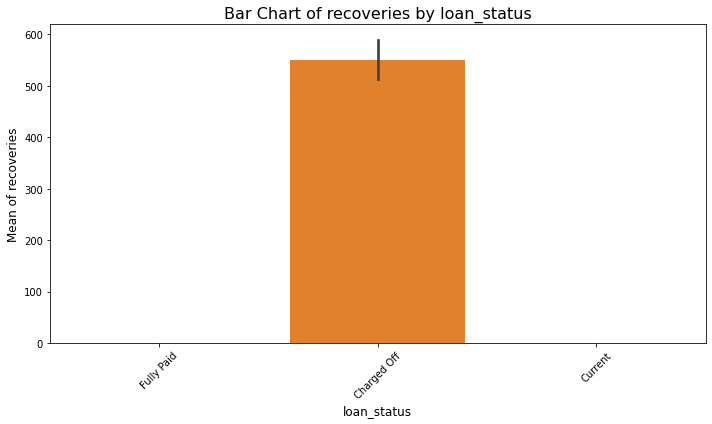

In [103]:
print(df_fe.groupby(['loan_status', 'verification_status'])['recoveries'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'recoveries', hue =None)

loan_status  verification_status
Charged Off  Not Verified            3094.207436
             Source Verified         3082.662699
             Verified                4136.856138
Current      Not Verified            9452.009765
             Source Verified         9434.616233
             Verified               12411.172154
Fully Paid   Not Verified            8106.524917
             Source Verified         8945.392269
             Verified               12645.999296
Name: total_rec_prncp, dtype: float64


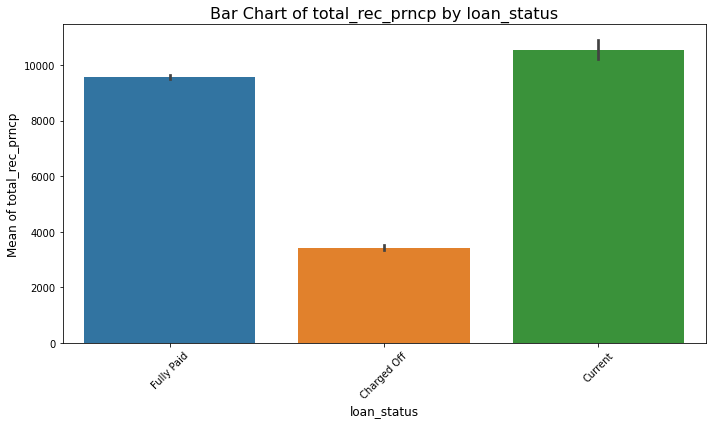

In [105]:
print(df_fe.groupby(['loan_status', 'verification_status'])['total_rec_prncp'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'total_rec_prncp', hue =None)

loan_status  verification_status
Charged Off  Not Verified           255.087009
             Source Verified        268.273572
             Verified               380.439374
Current      Not Verified           238.823709
             Source Verified        243.069058
             Verified               317.181615
Fully Paid   Not Verified           254.631692
             Source Verified        269.320986
             Verified               378.319416
Name: installment, dtype: float64
loan_status
Charged Off    299.780159
Current        269.455560
Fully Paid     292.369397
Name: installment, dtype: float64


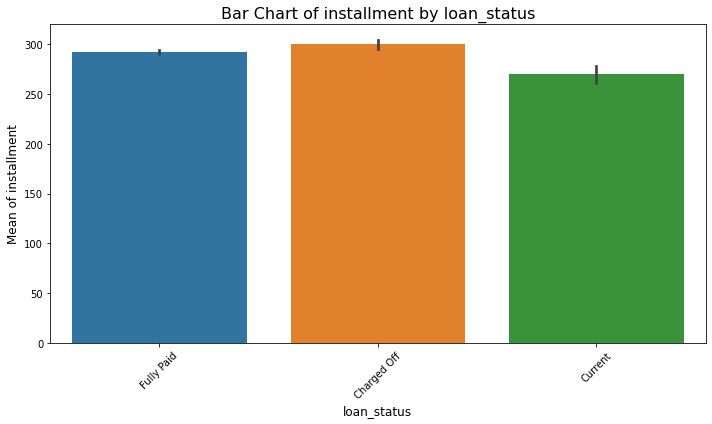

In [64]:
print(df_fe.groupby(['loan_status', 'verification_status'])['installment'].mean())
print(df_fe.groupby(['loan_status'])['installment'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'installment', hue =None)

loan_status  verification_status
Charged Off  Not Verified           13.421507
             Source Verified        13.941089
             Verified               14.595948
Current      Not Verified           11.929577
             Source Verified        13.793722
             Verified               11.303846
Fully Paid   Not Verified           12.495215
             Source Verified        12.909021
             Verified               12.488526
Name: mths_since_last_delinq, dtype: float64


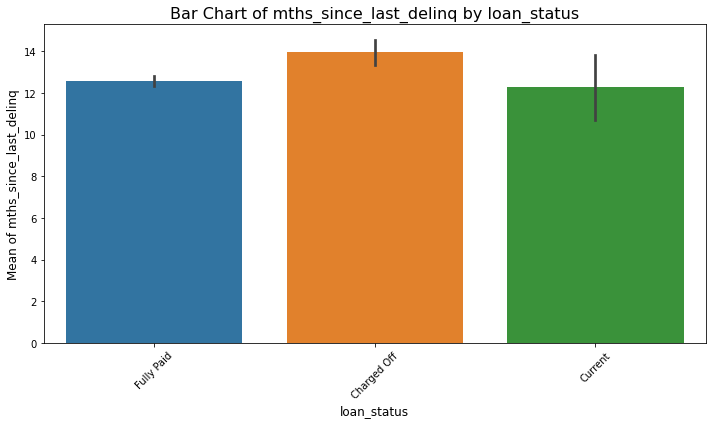

In [107]:
print(df_fe.groupby(['loan_status', 'verification_status'])['mths_since_last_delinq'].mean())
plot_categorical_vs_numerical(df_fe, 'loan_status',  'mths_since_last_delinq', hue =None)

In [108]:
df_fe.head()

,revol_bal,addr_state,recoveries,home_ownership,collection_recovery_fee,last_credit_pull_d,funded_amnt_inv,delinq_2yrs,pub_rec,funded_amnt,pub_rec_bankruptcies,total_acc,total_rec_late_fee,verification_status,last_pymnt_amnt,purpose,inq_last_6mths,term,emp_title,issue_d,installment,grade,sub_grade,last_pymnt_d,total_rec_prncp,total_pymnt_inv,out_prncp,loan_status,int_rate,total_rec_int,loan_amnt,annual_inc,mths_since_last_delinq,zip_code,earliest_cr_line,total_pymnt,open_acc,dti,out_prncp_inv,revol_util,emp_length,earliest_cr_no_years,total_acc_cat,zip_code_1
0,13648,AZ,0.00,RENT,0.00,2016-05-01,4975.0,0,0,5000,0.0,9,0.00,Verified,171.62,credit_card,1,36,Other,2011-12-01,162.87,B,B2,2015-01-01,5000.00,5833.84,0.00,Fully Paid,10.65,863.16,5000,24000.0,0.0,860,1985-01-01,5863.155187,3,27.65,0.00,83.7,10+ years,26,0-12,8
1,1687,GA,117.08,RENT,1.11,2013-09-01,2500.0,0,0,2500,0.0,4,0.00,Source Verified,119.66,car,5,60,Ryder,2011-12-01,59.83,C,C4,2013-04-01,456.46,1008.71,0.00,Charged Off,15.27,435.17,2500,30000.0,0.0,309,1999-04-01,1008.710000,3,1.00,0.00,9.4,< 1 year,12,0-12,3
2,2956,IL,0.00,RENT,0.00,2016-05-01,2400.0,0,0,2400,0.0,10,0.00,Not Verified,649.91,small_business,2,36,Other,2011-12-01,84.33,C,C5,2014-06-01,2400.00,3005.67,0.00,Fully Paid,15.96,605.67,2400,12252.0,0.0,606,2001-11-01,3005.666844,2,8.72,0.00,98.5,10+ years,10,0-12,6
3,5598,CA,0.00,RENT,0.00,2016-04-01,10000.0,0,0,10000,0.0,37,16.97,Source Verified,357.48,other,1,36,AIR RESOURCES BOARD,2011-12-01,339.31,C,C1,2015-01-01,10000.00,12231.89,0.00,Fully Paid,13.49,2214.92,10000,49200.0,35.0,917,1996-02-01,12231.890000,10,20.00,0.00,21.0,10+ years,15,28-60,9
4,27783,OR,0.00,RENT,0.00,2016-05-01,3000.0,0,0,3000,0.0,38,0.00,Source Verified,67.79,other,0,60,University Medical Group,2011-12-01,67.79,B,B5,2016-05-01,2475.94,3513.33,524.06,Current,12.69,1037.39,3000,80000.0,38.0,972,1996-01-01,3513.330000,15,17.94,524.06,53.9,1 year,15,28-60,9


In [115]:
def plot_top_bottom_distribution(df, col1, col2):
    # Group by col1 and col2, get the size (count) of each combination
    grouped_data = df.groupby([col1, col2]).size().reset_index(name='count')

    # Pivot the data to make col2 categories as columns for stacked bar plot
    pivot_data = grouped_data.pivot(index=col1, columns=col2, values='count').fillna(0)

    # Calculate the sum of all categories in col1 for sorting purposes
    pivot_data['total'] = pivot_data.sum(axis=1)

    # Sort based on total count and extract top 10 and bottom 10 categories from col1
    top_10 = pivot_data.nlargest(10, 'total').drop(columns='total')
    bottom_10 = pivot_data.nsmallest(10, 'total').drop(columns='total')

    # Create a figure with two horizontal bar plots
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    # Plot top 10 categories
    top_10.plot(kind='barh', stacked=True, ax=axes[0], cmap='RdBu_r')
    axes[0].set_title(f'Top 10 {col1} by {col2} Distribution')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel(col1)

    # Plot bottom 10 categories
    bottom_10.plot(kind='barh', stacked=True, ax=axes[1], cmap='cividis')
    axes[1].set_title(f'Bottom 10 {col1} by {col2} Distribution')
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel(col1)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

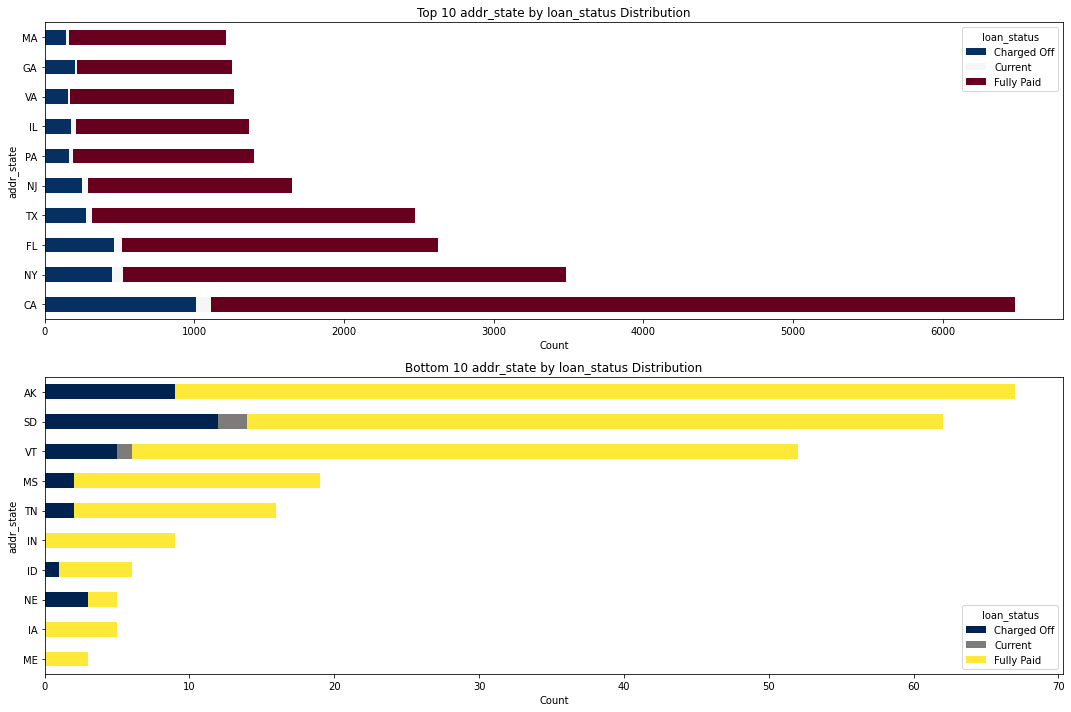

In [116]:
plot_top_bottom_distribution(df_fe, 'addr_state', 'loan_status')

In [119]:
def plot_top_bottom_categories(df, categorical_col, numerical_col):
    # Group by the categorical column and calculate the mean of the numerical variable
    grouped_data = df.groupby(categorical_col)[numerical_col].mean().reset_index()

    # Sort the data to get top 10 and bottom 10
    top_10 = grouped_data.nlargest(10, numerical_col)
    bottom_10 = grouped_data.nsmallest(10, numerical_col)

    # Create a figure with two horizontal bar plots
    fig, axis = plt.subplots(2, 1, figsize=(10, 10))

    # Plot top 10 categories
    sns.barplot(x=numerical_col, y=categorical_col, data=top_10, ax=axis[0], palette="viridis")
    axis[0].set_title(f'Top 10 {categorical_col} by {numerical_col} Mean')

    # Plot bottom 10 categories
    sns.barplot(x=numerical_col, y=categorical_col, data=bottom_10, ax=axis[1], palette="magma")
    axis[1].set_title(f'Bottom 10 {categorical_col} by {numerical_col} Mean')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

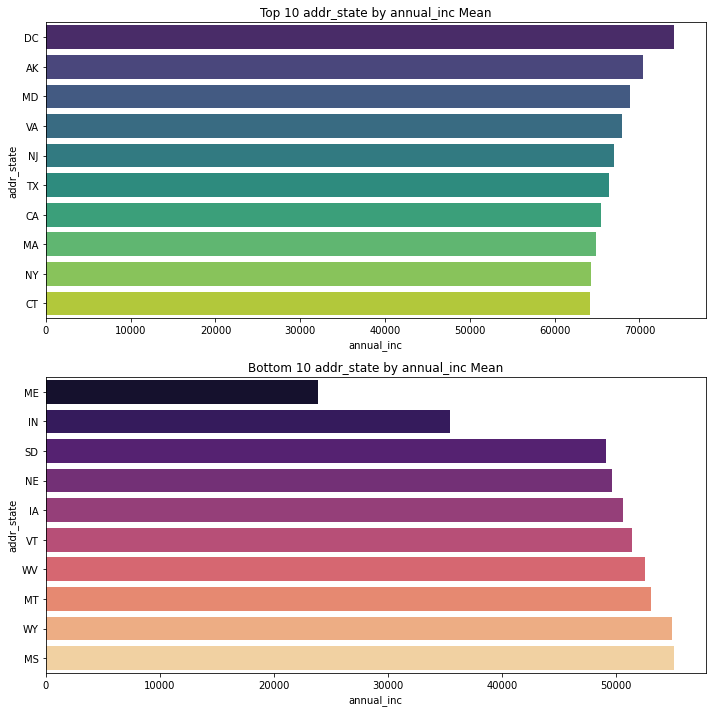

In [122]:
plot_top_bottom_categories(df_fe, 'addr_state', 'annual_inc')